In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.datasets import load_iris
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

##### Decision Boundary Function (one small modification)

In [3]:
## a function for plotting the decision boundary
# Set min and max values and give it some padding
def decision_boundary(X,y,clf,ax):
    x_min, x_max = X[:, 0].min(), X[:, 0].max() 
    y_min, y_max = X[:, 1].min(), X[:, 1].max() 
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100).reshape(-1,1), np.linspace(y_min, y_max, 100).reshape(-1,1))
    # Predict the function value for the whole gid
    X_new = np.c_[xx.ravel(), yy.ravel()]
    y_pred = clf.predict(X_new) # Translates slice objects to concatenation along the second axis
    print(y_pred.shape)
    zz = y_pred.reshape(xx.shape)
    print(zz.shape)
    # Plot the contour and training examples
    #fig, ax = plt.subplots()
    from matplotlib.colors import ListedColormap
    cm2 = ListedColormap(['#0000aa', '#ff2020','#386cb0'])
    ax.contourf(xx, yy, zz,alpha=.4, cmap=cm2) 
    ax.scatter(X[:, 0], X[:, 1], c =y)
    ax.set_xlabel('feature1')
    ax.set_ylabel('feature2')
    return ax

#### Data Preparation

In [4]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

X_train, X_test , y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.20,random_state=42)


#### Calculating feature importance for the RF model

In [6]:
#feature importance
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)
for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
    print(round(score, 2), name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


#### Implementing AdaBoost Classifier on Iris Dataset

In [53]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=30,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

In [54]:
print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))

Accuracy on training set: 0.917
Accuracy on test set: 0.967


##### PCA 

In [9]:
from sklearn import datasets
# import datasets 
cancer = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_standard=cancer_df.copy()
scaled_df_standard=pd.DataFrame(scaler.fit_transform(scaled_df_standard), columns=scaled_df_standard.columns)
scaled_df_standard.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [11]:
# PCA 
from sklearn.decomposition import PCA 
# keep the first two components of the data 
pca = PCA (n_components=2)
# fit the PCA model to the scaled data 
pca.fit(scaled_df_standard)
x_pca = pca.transform(scaled_df_standard)

Text(0, 0.5, 'PC2')

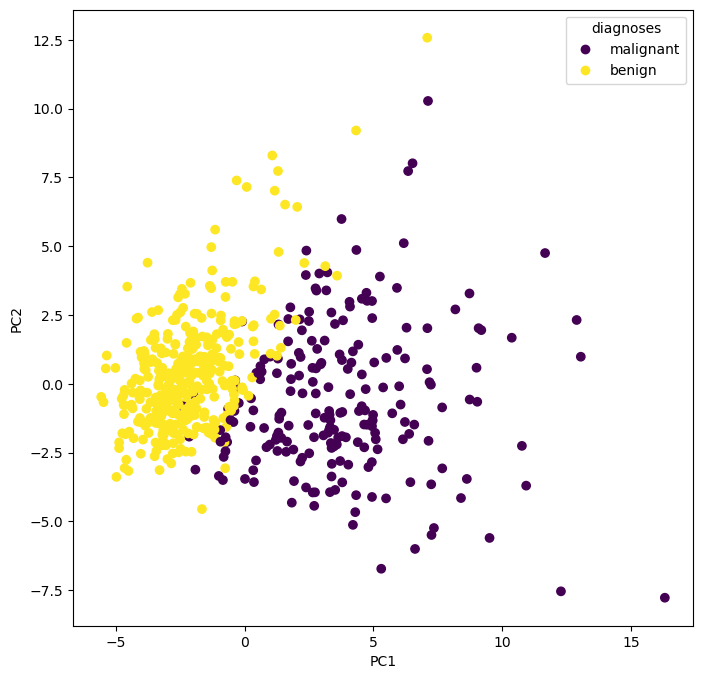

In [12]:
plt.figure(figsize=(8,8))
scatter=plt.scatter(x_pca[:,0],x_pca[:,1],c =cancer.target)
plt.legend(handles=scatter.legend_elements()[0], labels=cancer.target_names.tolist(), title="diagnoses")
plt.xlabel("PC1")
plt.ylabel("PC2")

In [20]:
# splitting the data into train and test 
X_train, X_test , y_train, y_test = train_test_split(cancer_df, cancer.target, test_size=0.20,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
#applying PCA on the training data 
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Text(0, 0.5, 'PC2')

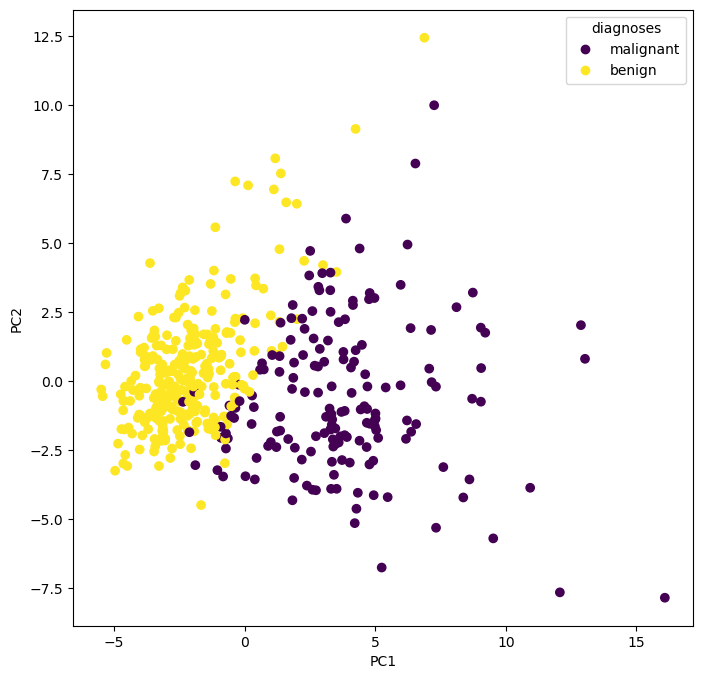

In [22]:
plt.figure(figsize=(8,8))
scatter=plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c =y_train)
plt.legend(handles=scatter.legend_elements()[0], labels=cancer.target_names.tolist(), title="diagnoses")
plt.xlabel("PC1")
plt.ylabel("PC2")

In [23]:
pca.explained_variance_ratio_

array([0.43502782, 0.19500007, 0.09781519, 0.06486409])

In [38]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=100, random_state=42)
RF_clf.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [39]:
print("Accuracy on training set: {:.3f}".format(RF_clf.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.3f}".format(RF_clf.score(X_test_pca, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.956


In [ ]:
#practice using logistic regression
from sklearn.linear_model import LogisticRegression

lr_model_default = LogisticRegression(random_state=100, max_iter=4000) 
lr_model_default.fit(X_train_pca, y_train)

# Print test accuracy and confusion matrix for default solver 
print("Accuracy on training set: {:.3f}".format(lr_model_default.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.3f}".format(lr_model_default.score(X_test_pca, y_test)))
